# DATA PREPROCESSING

## 1.1 Exploratory Data Analysis (EDA)
**Exploratory Data Analysis (EDA)** is a crucial step in the data analysis process. It involves examining and summarizing data sets to better understand their main characteristics, patterns, and relationships. Through EDA, analysts can identify outliers, detect missing values, explore distributions, and gain initial insights into the data. The primary goal of EDA is to unearth meaningful information and gain a deeper understanding of the data before applying more advanced analytical techniques. By exploring the data comprehensively, analysts can make informed decisions about the appropriate modeling and analysis strategies to use. This can involve various techniques such as:

- Handling Duplicated Values
- Handling Noising Values
- Handling Missing Values
- Balancing Dataset IF Task Is Classification
- Summary Statistics
- Correlation Analysis
- Inconsistant Data Entry
- Data Visualization

## 1.2 Feature Engineering
**Feature engineering** is an essential process in Machine Learning, involving the creation and selection of relevant features or variables from raw data. It aims to maximize the predictive power of the models by extracting meaningful information and patterns that can improve their performance. In feature engineering, domain knowledge and creativity are applied to transform the original data into a more suitable representation for the Machine Learning Algorithms. This can involve various techniques such as:

- **Feature extraction:** Deriving new features from existing ones by applying mathematical transformations, aggregations, or statistical measures. For example, extracting the month and year from a date variable or calculating ratios between numeric variables.

- **Feature encoding:** Converting categorical or textual variables into numerical representations that machine learning algorithms can process. This can be done through techniques like one-hot encoding, label encoding, or embedding.

- **Feature scaling:** Standardizing or normalizing numerical features to ensure they have similar scales and ranges. This helps algorithms that are sensitive to the magnitude of the variables, such as linear regression or K-means clustering.

- **Feature selection:** Identifying the most informative features that contribute significantly to the predictive power of the model while discarding irrelevant or redundant ones. This reduces computational complexity and improves generalization.

- **Feature combination:** Creating new features by combining existing ones, often through arithmetic operations or interactions between variables. For example, multiplying two variables to capture their interaction effect.

Effective feature engineering can greatly impact the performance of machine learning models, leading to improved accuracy, reduced overfitting, and better interpretability. It requires a deep understanding of the data, problem domain, and the algorithms being used. Through iterative experimentation and evaluation, feature engineering enables the extraction of the most relevant and informative features that empower models to make accurate predictions.

# PROBLEM
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.
This dataset consists of 13 following attributes:

- **loan_id:** Unique identifier for each loan.
- **no_of_dependents:** Number of dependents of the loan applicant.
- **education:** Educational qualification of the applicant (Graduate or Not Graduate)
- **self_employed:** Employment status of the applicant (Yes or No)
- **income_annum:**  Annual income of the applicant (in currency).
- **loan_amount:** Total amount of the loan requested.
- **loan_term:** Duration of the loan (in months).
- **cibil_score:**  Credit score of the applicant.
- **residential_assets_value**
- **commercial_assets_value**
- **luxury_assets_value**
- **bank_asset_value**
- **loan_status:**  Target variable indicating whether the loan was Approved or Rejected.
### Import Essential Libreries



In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

### Preprocessing

In [2]:
dataset = pd.read_csv("loan_approval_dataset.csv")
dataset.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# More details about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
#summary_statistics
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
dataset.shape

(4269, 13)

#### handling duplicates and null

In [6]:
#check for missing values and remove if any
print(dataset.isnull().sum())


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [7]:
# Remove duplicates based on all columns
print(f'Shape of Loan Dataset before drop duplicated Row is: {dataset.shape}')
loan_dataset = dataset.drop_duplicates()
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {dataset.shape}')

Shape of Loan Dataset before drop duplicated Row is: (4269, 13)
Shape of Loan Dataset After Drop Duplicated Row is: (4269, 13)


#### Handling Missing Values
There are several ways to handle the missing values:
- Remove rows/samples containing missing values
- Remove columns/attributes containing missing values
- Filling missing values with statistical characteristics or a constant value
- Predicting missing values
- Using an algorithm insensitive to missing values

In [8]:
df= dataset.dropna()
df.shape

(4269, 13)

Means there are no duplicated samples or null

In [9]:
df.columns= df.columns.str.strip()

## Feature Engineering

In [11]:
# creating income-to-loan ratio
df['income_to_loan_ratio']= df['income_annum']/ df['loan_amount']
# creating total asset value i.e which is the sum of
# residential assets, commercial assets, luxury assets and bank assets
df['total_asset_value'] = df['residential_assets_value']+ df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
# creating LTV_ratio (Loan_to_value Ratio)
# A lower LTV ratio indicates thatthe borrower has
# a larger down payment, reducing the lender's risk.
df['LTV_ratio%']= df['loan_amount']/ df['total_asset_value'] * 100

In [12]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_ratio,total_asset_value,LTV_ratio%
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0.321070,50700000,58.974359
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0.336066,17000000,71.764706
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0.306397,57700000,51.473137
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0.267101,52700000,58.254269
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0.404959,55000000,44.000000


In [10]:
df.shape

(4269, 13)

### Drop Redundant Features

In [13]:
df= df.drop(['loan_id','residential_assets_value','commercial_assets_value',
             'luxury_assets_value','bank_asset_value'], axis=1)
df.shape

(4269, 11)

## Encode Categorical Features

In [14]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Encode 'education', 'self_employed', and 'loan_status'
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])  # 1: Approved, 0: Rejected

df.head(7)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value,LTV_ratio%
0,2,0,0,9600000,29900000,12,778,0,0.321070,50700000,58.974359
1,0,1,1,4100000,12200000,8,417,1,0.336066,17000000,71.764706
2,3,0,0,9100000,29700000,20,506,1,0.306397,57700000,51.473137
3,3,0,0,8200000,30700000,8,467,1,0.267101,52700000,58.254269
4,5,1,1,9800000,24200000,20,382,1,0.404959,55000000,44.000000
5,0,0,1,4800000,13500000,10,319,1,0.355556,33900000,39.823009
6,5,0,0,8700000,33000000,4,678,0,0.263636,70800000,46.610169


## Feature Scaling

In [15]:
#Normalize numerical features like income_annum, loan_amount, and asset values using StandardScaler for model compatibility.
# Initialize scaler
scaler = StandardScaler()

# Identify numerical columns
num_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score' ,
            'total_asset_value','income_to_loan_ratio','LTV_ratio%']

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value,LTV_ratio%
0,2,0,0,1.617979,1.633052,0.192617,1.032792,0,-0.383614,0.930628,0.706945
1,0,1,1,-0.341750,-0.324414,-0.508091,-1.061051,1,-0.181519,-0.797198,1.585783
2,3,0,0,1.439822,1.610933,1.594031,-0.544840,1,-0.581364,1.289524,0.191529
3,3,0,0,1.119139,1.721525,-0.508091,-0.771045,1,-1.110968,1.033170,0.657467
4,5,1,1,1.689242,1.002681,1.594031,-1.264055,1,0.746968,1.151093,-0.321958
5,0,0,1,-0.092330,-0.180645,-0.157737,-1.629463,1,0.081152,0.069279,-0.608963
6,5,0,0,1.297296,1.975885,-1.208798,0.452780,0,-1.157661,1.961171,-0.142611
7,2,0,1,0.228353,-0.014758,1.594031,-1.264055,1,0.410595,0.212837,-0.536891
8,0,0,1,-1.517587,-1.430327,1.594031,1.055993,0,0.190059,-1.386812,-0.596802
9,5,1,0,-1.410692,-1.198085,-0.157737,-1.229255,1,-1.263086,-1.181729,-0.235165


## Handling Outlier Values
An **Outlier** is a sample that looks different from the majority of samples in the data set. Your dataset can contain outliers for two reasons:

- **Error in data collection and recording process:** It is possible that in the process of data collection, values have been wrongly recorded by human (typing error) or computer system in the data collection file.
- **Actual data distribution:** If the outliers are not due to "error in the data collection and recording process", it means that the actual distribution of the data is like this.

## Box Plot of the dataset

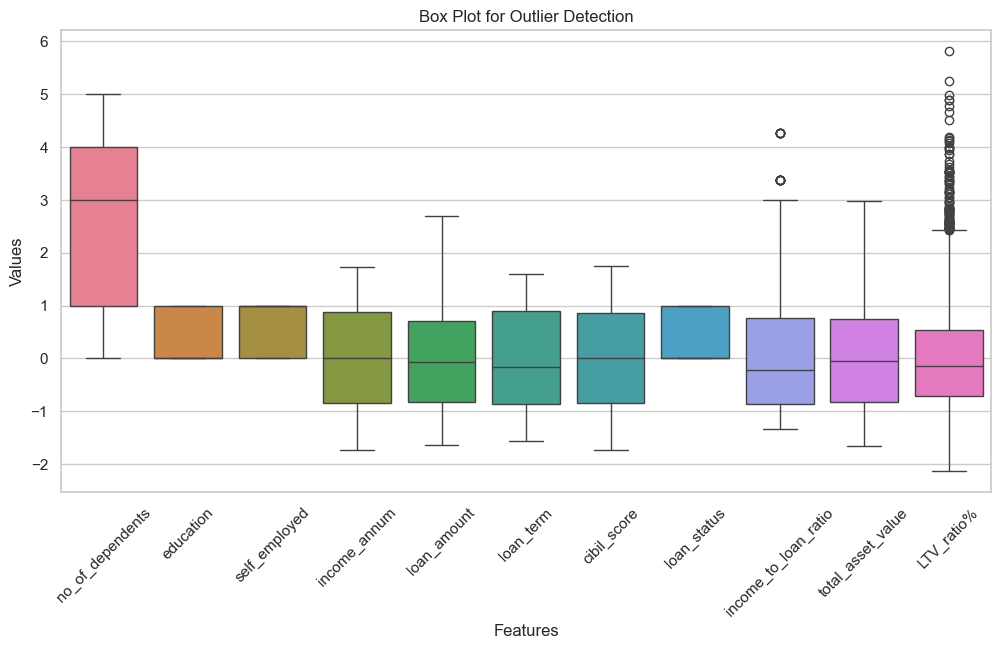

In [16]:
# Set the aesthetics for the plots
import seaborn as sns
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Outlier Detection and treatment using Z-score method

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Print the outliers for each column
print(outliers.sum())

no_of_dependents          0
education                 0
self_employed             0
income_annum              0
loan_amount               0
loan_term                 0
cibil_score               0
loan_status               0
income_to_loan_ratio     15
total_asset_value         0
LTV_ratio%              101
dtype: int64


In [18]:
from scipy import stats

# Assuming 'df' is your DataFrame

# Define a function to remove outliers based on Z-score
def remove_outliers_z_score(df, threshold=3):
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Calculate Z-scores for each numerical column
    z_scores = stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64']))

    # Create a boolean mask to identify outliers
    mask = (abs(z_scores) < threshold).all(axis=1)

    # Filter the DataFrame to exclude outliers
    df_cleaned = df_cleaned[mask]

    return df_cleaned

# Remove outliers from the dataset using Z-score
cleaned_dataset = remove_outliers_z_score(df)

# Display the cleaned dataset
cleaned_dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value,LTV_ratio%
0,2,0,0,1.617979,1.633052,0.192617,1.032792,0,-0.383614,0.930628,0.706945
1,0,1,1,-0.341750,-0.324414,-0.508091,-1.061051,1,-0.181519,-0.797198,1.585783
2,3,0,0,1.439822,1.610933,1.594031,-0.544840,1,-0.581364,1.289524,0.191529
3,3,0,0,1.119139,1.721525,-0.508091,-0.771045,1,-1.110968,1.033170,0.657467
4,5,1,1,1.689242,1.002681,1.594031,-1.264055,1,0.746968,1.151093,-0.321958


In [19]:
#  Outlier Detection after removing outliers using z-score method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cleaned_dataset.quantile(0.25)
Q3 = cleaned_dataset.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (cleaned_dataset < lower_bound) | (cleaned_dataset > upper_bound)

# Print the outliers for each column
print(outliers.sum())

no_of_dependents         0
education                0
self_employed            0
income_annum             0
loan_amount              0
loan_term                0
cibil_score              0
loan_status              0
income_to_loan_ratio     0
total_asset_value        0
LTV_ratio%              61
dtype: int64


## Outlier detection and treatment using IQR method

In [20]:
def remove_outliers_iqr(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3- Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    outliers_detected= df[~((df < lower_bound) | (df> upper_bound)).any(axis=1)]
    return outliers_detected
# remove outliers
df_cleaned = remove_outliers_iqr(cleaned_dataset)
df_cleaned.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value,LTV_ratio%
0,2,0,0,1.617979,1.633052,0.192617,1.032792,0,-0.383614,0.930628,0.706945
1,0,1,1,-0.341750,-0.324414,-0.508091,-1.061051,1,-0.181519,-0.797198,1.585783
2,3,0,0,1.439822,1.610933,1.594031,-0.544840,1,-0.581364,1.289524,0.191529
3,3,0,0,1.119139,1.721525,-0.508091,-0.771045,1,-1.110968,1.033170,0.657467
4,5,1,1,1.689242,1.002681,1.594031,-1.264055,1,0.746968,1.151093,-0.321958
5,0,0,1,-0.092330,-0.180645,-0.157737,-1.629463,1,0.081152,0.069279,-0.608963
6,5,0,0,1.297296,1.975885,-1.208798,0.452780,0,-1.157661,1.961171,-0.142611
7,2,0,1,0.228353,-0.014758,1.594031,-1.264055,1,0.410595,0.212837,-0.536891
8,0,0,1,-1.517587,-1.430327,1.594031,1.055993,0,0.190059,-1.386812,-0.596802
9,5,1,0,-1.410692,-1.198085,-0.157737,-1.229255,1,-1.263086,-1.181729,-0.235165


In [21]:
# Calculate the sum of outliers after trying IQR method
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outliers = (df_cleaned < lower_bound) | (df_cleaned > upper_bound)

# Print the outliers for each column
print(df_outliers.sum())

no_of_dependents        0
education               0
self_employed           0
income_annum            0
loan_amount             0
loan_term               0
cibil_score             0
loan_status             0
income_to_loan_ratio    0
total_asset_value       0
LTV_ratio%              9
dtype: int64


In [34]:
df_cleaned.shape

(4146, 11)

## Box Plot after Outlier removal

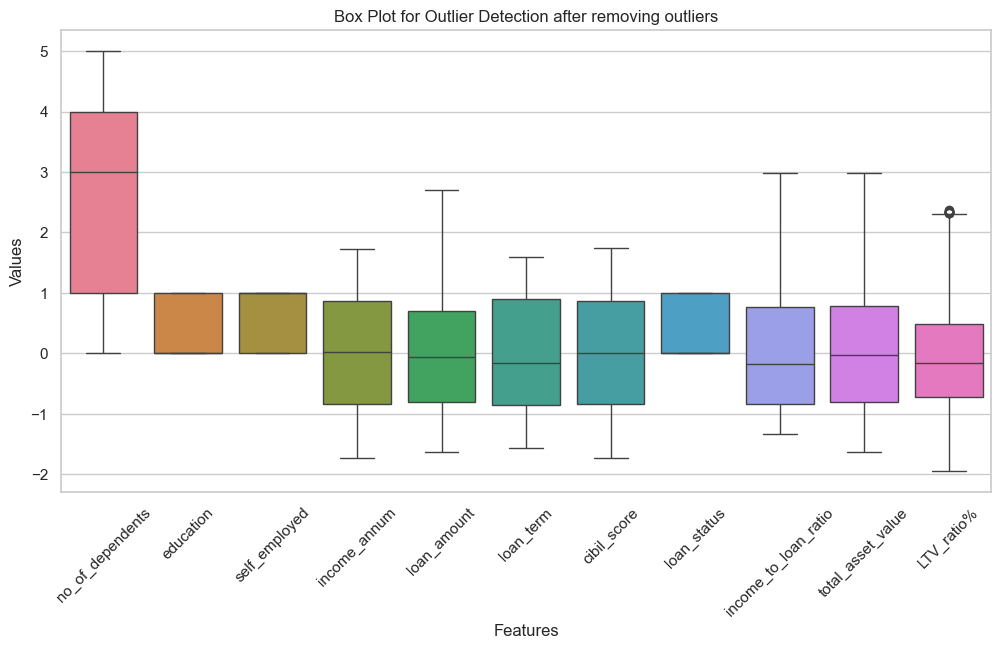

In [22]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data= df_cleaned)
plt.title('Box Plot for Outlier Detection after removing outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

#### Splitting Loan Dataset
- **Train Set:**  part of the original dataset on which the model learns.
- **Validation Set:** A part of the main dataset that is not used in the training process and we use it only in the process of improving the performance of the model.
- **Test Set:** A part of the main dataset on which the performance of the model is tested and reported as the final accuracy. These data should not be used when building the model because these data are real world examples

In [23]:
X = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']  # Target variable

In [24]:
feature_names = X.columns.tolist()  # List all column names from the original DataFrame

# Print the feature names
print("Feature names in X_test:", feature_names)

Feature names in X_test: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'income_to_loan_ratio', 'total_asset_value', 'LTV_ratio%']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_test: 10
